# Assignment 2

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [51]:
data = pd.read_csv('./emails (1).csv')
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [52]:
X = data.drop(['Prediction', 'Email No.'], axis=1)
y = data['Prediction']

In [53]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Support Vector Machine

In [55]:
model = SVC(C=10, kernel='rbf', verbose=1)

In [56]:
model.fit(X_train, y_train)

[LibSVM]..*
optimization finished, #iter = 2944
obj = -2360.162801, rho = -0.307189
nSV = 1359, nBSV = 201
Total nSV = 1359


SVC(C=10, verbose=1)

In [57]:
model.score(X_test, y_test)

0.9458937198067633

In [58]:
y_pred = model.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       719
           1       0.94      0.88      0.91       316

    accuracy                           0.95      1035
   macro avg       0.94      0.93      0.94      1035
weighted avg       0.95      0.95      0.95      1035



<AxesSubplot:>

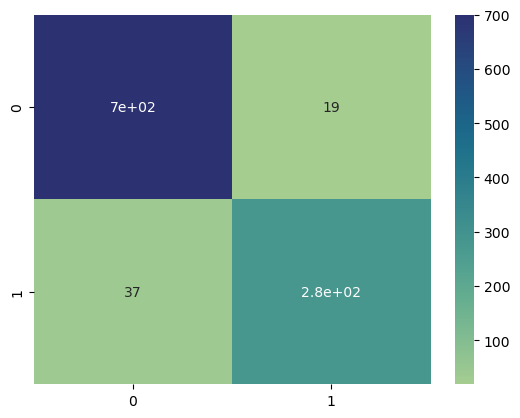

In [60]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='crest')

## K-nearest Neighbours

In [61]:
clf = KNeighborsClassifier(n_jobs=-1)

In [62]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [63]:
clf.score(X_test, y_test)

/home/mmcoe/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8338164251207729

In [64]:
y_pred = clf.predict(X_test)

/home/mmcoe/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       719
           1       0.66      0.94      0.78       316

    accuracy                           0.83      1035
   macro avg       0.81      0.86      0.82      1035
weighted avg       0.87      0.83      0.84      1035



<AxesSubplot:>

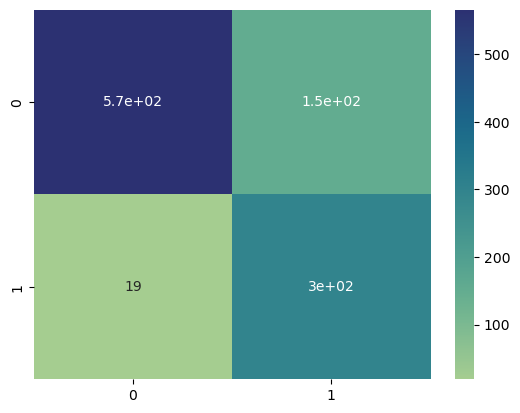

In [66]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='crest')